##Importe de librerias


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

##importe del dataset


In [ ]:
df_inmobiliaria = pd.read_excel("/content/ArchivosParcial/data_inmobiliaria.xls")
df_inmobiliaria.head(10)


,COD_INMUEBLE,NOM_SUCURSAL,NOM_BARRIO,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,FECHA_CONSIGNACION,FECHA_RECONSIGNACION,FECHA_CONTRATO,COD_ESTADO_CONTRATO
0,1,BARRANCABERMEJA,EL PALMAR,BARRANCABERMEJA,CUATRO,APARTAMENTO,23,632600,167400,2020-09-10,NaT,2020-09-12,VIGENTE
1,2,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,LOCAL,11,500000,0,2018-04-11,NaT,2020-11-26,VIGENTE
2,3,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,APARTAMENTO,24,500000,0,2018-04-11,NaT,2019-06-22,INACTIVO
3,4,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,TRES,LOCAL,20,515900,0,2018-04-11,NaT,2018-04-18,INACTIVO
4,5,BARRANCABERMEJA,TORCOROMA,BARRANCABERMEJA,TRES,APARTAMENTO,33,729000,271000,2020-09-22,NaT,2020-10-24,VIGENTE
5,6,BARRANCABERMEJA,COLOMBIA,BARRANCABERMEJA,CUATRO,CASA,23,520600,129400,2020-10-21,NaT,2020-10-30,VIGENTE
6,7,BARRANCABERMEJA,LOS PINOS,BARRANCABERMEJA,CUATRO,LOCAL,27,650000,0,2020-06-19,NaT,2020-07-30,INACTIVO
7,8,BARRANCABERMEJA,GALAN GOMEZ,BARRANCABERMEJA,CUATRO,CASA,97,780000,0,2019-12-06,NaT,2020-02-21,INACTIVO
8,9,BARRANCABERMEJA,LA LIBERTAD,BARRANCABERMEJA,CUATRO,LOCAL,29,1100000,170000,2020-07-07,NaT,2020-09-29,VIGENTE
9,10,BARRANCABERMEJA,PALMIRA,BARRANCABERMEJA,CUATRO,CASA,52,744000,156000,2020-01-24,NaT,2020-01-30,VIGENTE


##Reemplazar datos nulos por 0's

In [ ]:
df_inmobiliaria = df_inmobiliaria.fillna(0)

Eliminando columnas consideradas no aptas para el estudio

In [ ]:
df_inmobiliaria.drop(['COD_INMUEBLE', 'NOM_SUCURSAL', 'NOM_BARRIO','FECHA_CONTRATO', 'FECHA_RECONSIGNACION', 'FECHA_CONSIGNACION'], axis=1,inplace=True)
df_inmobiliaria.dropna(inplace=True)
df_inmobiliaria.head(60)



,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,COD_ESTADO_CONTRATO
0,BARRANCABERMEJA,CUATRO,APARTAMENTO,23,632600,167400,VIGENTE
1,BARRANCABERMEJA,TRES,LOCAL,11,500000,0,VIGENTE
2,BARRANCABERMEJA,TRES,APARTAMENTO,24,500000,0,INACTIVO
3,BARRANCABERMEJA,TRES,LOCAL,20,515900,0,INACTIVO
4,BARRANCABERMEJA,TRES,APARTAMENTO,33,729000,271000,VIGENTE
5,BARRANCABERMEJA,CUATRO,CASA,23,520600,129400,VIGENTE
6,BARRANCABERMEJA,CUATRO,LOCAL,27,650000,0,INACTIVO
7,BARRANCABERMEJA,CUATRO,CASA,97,780000,0,INACTIVO
8,BARRANCABERMEJA,CUATRO,LOCAL,29,1100000,170000,VIGENTE
9,BARRANCABERMEJA,CUATRO,CASA,52,744000,156000,VIGENTE


##Cambiando los numeros 0's por la palabra CERO

In [ ]:
df_inmobiliaria['ESTRATO']= df_inmobiliaria['ESTRATO'].replace([0],['CERO'])



##Cambiando los valores de estrato, escritos a valores numericos

In [ ]:
from sklearn import preprocessing    #clase que permite hacer ETL cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le = preprocessing.LabelEncoder()
df_inmobiliaria['ESTRATO'] = le.fit_transform(df_inmobiliaria['ESTRATO'])
df_inmobiliaria.head(10)


,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,COD_ESTADO_CONTRATO
0,BARRANCABERMEJA,3,APARTAMENTO,23,632600,167400,VIGENTE
1,BARRANCABERMEJA,7,LOCAL,11,500000,0,VIGENTE
2,BARRANCABERMEJA,7,APARTAMENTO,24,500000,0,INACTIVO
3,BARRANCABERMEJA,7,LOCAL,20,515900,0,INACTIVO
4,BARRANCABERMEJA,7,APARTAMENTO,33,729000,271000,VIGENTE
5,BARRANCABERMEJA,3,CASA,23,520600,129400,VIGENTE
6,BARRANCABERMEJA,3,LOCAL,27,650000,0,INACTIVO
7,BARRANCABERMEJA,3,CASA,97,780000,0,INACTIVO
8,BARRANCABERMEJA,3,LOCAL,29,1100000,170000,VIGENTE
9,BARRANCABERMEJA,3,CASA,52,744000,156000,VIGENTE


##Cambiando los datos de texto a numericos

In [ ]:
from sklearn import preprocessing    #clase que permite hacer ETL cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le = preprocessing.LabelEncoder()
df_inmobiliaria['COD_ESTADO_CONTRATO'] = le.fit_transform(df_inmobiliaria['COD_ESTADO_CONTRATO'])
df_inmobiliaria['TIPO_INMUEBLE'] = le.fit_transform(df_inmobiliaria['TIPO_INMUEBLE'])
df_inmobiliaria.head(60)

,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,COD_ESTADO_CONTRATO
0,BARRANCABERMEJA,3,0,23,632600,167400,2
1,BARRANCABERMEJA,7,2,11,500000,0,2
2,BARRANCABERMEJA,7,0,24,500000,0,0
3,BARRANCABERMEJA,7,2,20,515900,0,0
4,BARRANCABERMEJA,7,0,33,729000,271000,2
5,BARRANCABERMEJA,3,1,23,520600,129400,2
6,BARRANCABERMEJA,3,2,27,650000,0,0
7,BARRANCABERMEJA,3,1,97,780000,0,0
8,BARRANCABERMEJA,3,2,29,1100000,170000,2
9,BARRANCABERMEJA,3,1,52,744000,156000,2


##Cambiando los valores de 0 por el valor de la moda de la columna

In [ ]:
for i in range(len(df_inmobiliaria['ESTRATO'])):
        if df_inmobiliaria ['ESTRATO'][i] == 0:
            df_inmobiliaria.loc[i, 'ESTRATO'] = stat.mode(df_inmobiliaria['ESTRATO'])

##Cambiando los valores escritos en la columna nom_ciudad por su relativa categoria 

In [ ]:
from sklearn import preprocessing    #clase que permite hacer ETL cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le = preprocessing.LabelEncoder()
df_inmobiliaria['NOM_CIUDAD'] = le.fit_transform(df_inmobiliaria['NOM_CIUDAD'])
df_inmobiliaria.head(60)

,NOM_CIUDAD,ESTRATO,TIPO_INMUEBLE,AREA,VLR_CANON,VLR_ADMINISTRACION,COD_ESTADO_CONTRATO
0,0,2,0,23,632600,167400,2
1,0,6,2,11,500000,0,2
2,0,6,0,24,500000,0,0
3,0,6,2,20,515900,0,0
4,0,6,0,33,729000,271000,2
5,0,2,1,23,520600,129400,2
6,0,2,2,27,650000,0,0
7,0,2,1,97,780000,0,0
8,0,2,2,29,1100000,170000,2
9,0,2,1,52,744000,156000,2


##Impresion de datos para ver cuantos nulos hay

In [ ]:
print("\nValores nulos totales:\n", df_inmobiliaria.isnull().sum())


Valores nulos totales:
 NOM_CIUDAD             0
ESTRATO                0
TIPO_INMUEBLE          0
AREA                   0
VLR_CANON              0
VLR_ADMINISTRACION     0
COD_ESTADO_CONTRATO    0
dtype: int64


##Realizando el proceso de etiquetado de cada columna

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_inmobiliaria['ESTRATO'] = label_encoder.fit_transform(df_inmobiliaria['ESTRATO'])
df_inmobiliaria['TIPO_INMUEBLE'] = label_encoder.fit_transform(df_inmobiliaria['TIPO_INMUEBLE'])
df_inmobiliaria['COD_ESTADO_CONTRATO'] = label_encoder.fit_transform(df_inmobiliaria['COD_ESTADO_CONTRATO'])

In [ ]:
print("\nColumnas del modelo: \n", df_inmobiliaria.head(10))


Columnas del modelo: 
    NOM_CIUDAD  ESTRATO  ...  VLR_ADMINISTRACION  COD_ESTADO_CONTRATO
0           0        2  ...              167400                    2
1           0        6  ...                   0                    2
2           0        6  ...                   0                    0
3           0        6  ...                   0                    0
4           0        6  ...              271000                    2
5           0        2  ...              129400                    2
6           0        2  ...                   0                    0
7           0        2  ...                   0                    0
8           0        2  ...              170000                    2
9           0        2  ...              156000                    2

[10 rows x 7 columns]


##Graficación de los layout correspondientes a las relaciones entre columnas

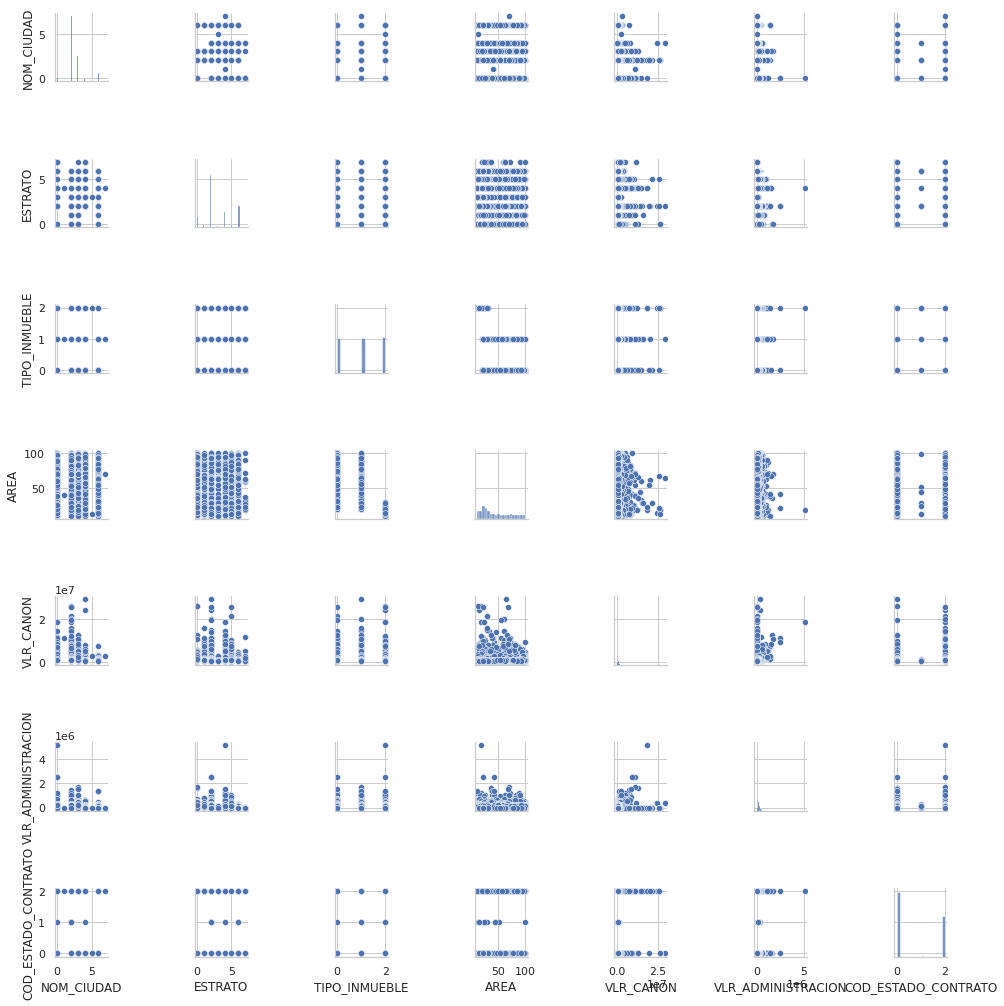

In [ ]:
sb.set(style="whitegrid", context="notebook")
plot_data = df_inmobiliaria.columns
sb.pairplot(df_inmobiliaria[plot_data], height=2)
plt.tight_layout()
plt.show()

##Impresion de la matriz de correlación

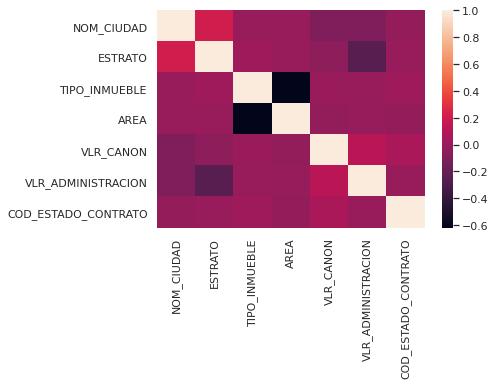

In [ ]:
correlation_mat = df_inmobiliaria.corr()
sb.heatmap(correlation_mat, annot=False)
plt.show()

##Declaración de los ejes para el estudio

In [ ]:
x_axis = df_inmobiliaria.drop("COD_ESTADO_CONTRATO", axis=1)
y_axis = df_inmobiliaria["COD_ESTADO_CONTRATO"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.1, random_state=4)

Entrenamiento de la IA

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regression_tree = DecisionTreeRegressor()
regression_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

##Obteninedo el valor de la inferencia real

In [ ]:
y_pred = regression_tree.predict(x_test)
inferencia = accuracy_score(y_test, y_pred)
print(f"\nInferencia del modelo: {str(inferencia)} %")


Inferencia del modelo: 0.6161764705882353 %


##------------------------------------------------------------------------------------------

##Pruebas con arbol de decisión 


Instanciamiento de las variables  Y y X

In [ ]:
arbol = DecisionTreeClassifier(max_depth=10, random_state=4)

In [ ]:
X= df_inmobiliaria[["TIPO_INMUEBLE","AREA","ESTRATO","VLR_CANON","NOM_CIUDAD","VLR_ADMINISTRACION"]]
Y= df_inmobiliaria['COD_ESTADO_CONTRATO']
#train y test, random_state=number --> estraer siempre los mismo datos en el entrenamiento (capacitación)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=4)
arbol.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [ ]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.6926853215513009
Accuracy of test: %0.6426470588235295
Accuracy Global %0.6426470588235295
